# Hotel Booking Cancellation Tendency
### Created By : Ivanka Larasati Kusumadewi

**Context**  
Data ini berasal dari sistem manajemen pemesanan hotel dan mencakup berbagai fitur yang dapat memberikan wawasan tentang perilaku pelanggan dan pengelolaan pemesanan hotel. Setiap baris data mencerminkan sebuah pemesanan dengan informasi terkait pelanggan, tipe kamar yang dipesan, jenis permintaan khusus, status pembatalan, serta perubahan yang dilakukan pada pemesanan. Data ini bertujuan untuk menganalisis faktor-faktor yang mempengaruhi pembatalan pemesanan dan mengidentifikasi pola-pola yang dapat digunakan untuk memprediksi kemungkinan pembatalan di masa depan.

**Target**
- 0 : Tidak mencari cancel booking
- 1 : Cancel booking

**Problem Statement**

Pembatalan pemesanan hotel menyebabkan kerugian finansial signifikan karena opportunity cost, yaitu pendapatan yang hilang akibat kamar yang kosong. Ketika sebuah pemesanan dibatalkan, hotel kehilangan kesempatan untuk mengisi kamar tersebut dengan pelanggan lain yang mungkin tidak hanya menginap, tetapi juga membeli layanan tambahan seperti sarapan, spa, atau layanan lainnya.

**Goals**

Untuk mengurangi kerugian akibat opportunity cost dengan memprediksi pembatalan pemesanan, sehingga hotel dapat mengoptimalkan alokasi sumber daya seperti staf dan fasilitas. Selain itu, analisis ini bertujuan untuk mengidentifikasi faktor-faktor utama yang mempengaruhi pembatalan, sehingga hotel dapat meningkatkan perencanaan operasional dan stabilitas pendapatan, serta meningkatkan kepuasan pelanggan dengan mengurangi ketidakpastian dalam proses pemesanan.

**Analytic Approach**

Analisis ini akan menggunakan algoritma klasifikasi untuk memprediksi pembatalan pemesanan berdasarkan fitur-fitur seperti tipe pelanggan dan perubahan pemesanan. Tujuannya adalah untuk mengidentifikasi faktor-faktor utama yang mempengaruhi pembatalan dan memberikan wawasan bagi hotel dalam mengoptimalkan sumber daya dan mengurangi kerugian.



**Matric Evaluation**

**Type 1 error : False Positive**

**Deskripsi :** Ketika kita memprediksi bahwa pelanggan akan membatalkan pemesanan, tetapi kenyataannya pelanggan tidak jadi membatalkan.

**Konsekuensi:**
Hotel akan mengalokasikan sumber daya (seperti staf atau fasilitas) untuk pemesanan yang akhirnya tidak dibatalkan, yang menyebabkan pemborosan waktu dan biaya operasional. Ini juga bisa mengganggu perencanaan kapasitas hotel karena mereka bersiap untuk pembatalan yang tidak terjadi

**Type 2 error : False Negative**  

**Deskripsi :** Ketika kita memprediksi bahwa pelanggan tidak akan membatalkan pemesanan, tetapi ternyata pelanggan membatalkan pemesanan tersebut.

**Konsekuensi :**
Hotel kehilangan kesempatan untuk mengelola pemesanan yang dibatalkan, seperti mengisi kembali kamar yang kosong atau merencanakan sumber daya secara lebih efisien. Hal ini menyebabkan kerugian finansial karena kamar tidak dapat dijual kembali, yang berujung pada opportunity cost.

Untuk problem ini, metric utama yang akan digunakan adalah Mmatrix recall

## Data Understanding

### Attribute Information

| **Attribute**                    | **Data Type, Length** | **Description** |
| --------------------------------- | --------------------- | --------------- |
| **country**                       | Text                  | Country of origin of the customer. |
| **market_segment**                | Text                  | Market segment designation (e.g., online travel agents, corporate, etc.). |
| **previous_cancellations**        | Integer               | Number of previous bookings cancelled by the customer. |
| **booking_changes**               | Integer               | Number of changes/amendments made to the booking after it was entered. |
| **deposit_type**                  | Text                  | Indicates whether the customer made a deposit to guarantee the booking (e.g., no deposit, non-refundable, refundable). |
| **days_in_waiting_list**          | Integer               | Number of days the booking was on the waiting list before it was confirmed. |
| **customer_type**                 | Text                  | Type of booking (e.g., transient, contract, group). |
| **reserved_room_type**            | Text                  | Code for the reserved room type (anonymized). |
| **required_car_parking_space**   | Integer               | Number of car parking spaces required by the customer. |
| **total_of_special_request**     | Integer               | Number of special requests made by the customer (e.g., twin bed, high floor). |
| **is_canceled**                   | Integer               | Whether the booking was canceled (1 for canceled, 0 for not canceled). |


In [1]:
# Library 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Visualisasi distribusi target
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Load data
df = pd.read_csv("data_hotel_booking_demand.csv")
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [3]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


#### Visualisasi kolom `is_canceled`

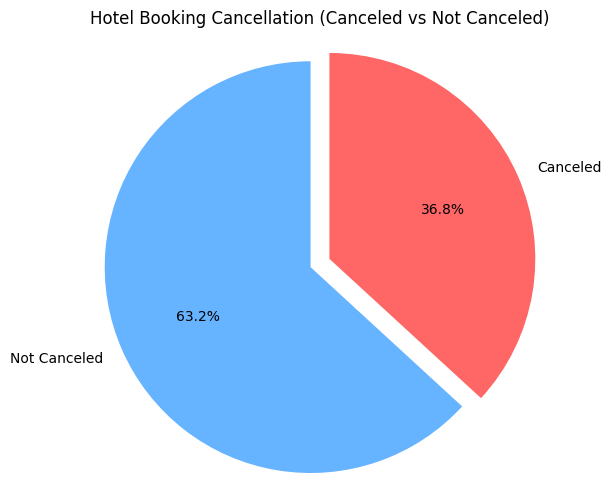

In [4]:
# Menghitung jumlah pembatalan (1) dan tidak pembatalan (0)
cancel_counts = df['is_canceled'].value_counts()

# Membuat pie chart
labels = ['Not Canceled', 'Canceled']
colors = ['#66b3ff', '#ff6666']  # Warna untuk tidak dibatalkan dan dibatalkan
plt.figure(figsize=(6, 6))
plt.pie(cancel_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.title('Hotel Booking Cancellation (Canceled vs Not Canceled)')
plt.axis('equal')  # Membuat pie chart bulat
plt.show()

## Data Cleaning
Beberapa kolom mungkin memiliki nilai kosong dan kita akan mengisi atau menghapusnya berdasarkan logika bisnis.

In [5]:
# Membuat deskripsi data
listItem = []

# Loop untuk setiap kolom dalam DataFrame
for col in df.columns:
    listItem.append([
        col,  # Nama kolom
        df[col].dtype,  # Tipe data kolom
        df[col].isna().sum(),  # Jumlah nilai kosong
        round((df[col].isna().sum() / len(df)) * 100, 2),  # Persentase nilai kosong
        df[col].nunique(),  # Jumlah nilai unik
        list(df[col].dropna().drop_duplicates().sample(2).values) if df[col].nunique() > 1 else list(df[col].dropna().unique())  # Sampel nilai unik
    ])

# Membuat DataFrame deskripsi
dfDesc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
    data=listItem
)

# Menampilkan deskripsi data
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[AND, BWA]"
1,market_segment,object,0,0.00,8,"[Direct, Groups]"
2,previous_cancellations,int64,0,0.00,15,"[26, 11]"
3,booking_changes,int64,0,0.00,19,"[8, 0]"
4,deposit_type,object,0,0.00,3,"[No Deposit, Refundable]"
5,days_in_waiting_list,int64,0,0.00,115,"[122, 100]"
6,customer_type,object,0,0.00,4,"[Group, Transient-Party]"
7,reserved_room_type,object,0,0.00,10,"[C, A]"
8,required_car_parking_spaces,int64,0,0.00,5,"[2, 3]"
9,total_of_special_requests,int64,0,0.00,6,"[5, 3]"


#### Descriptive Statistics

In [6]:
# Statistik deskriptif untuk data numerik
print("Statistik Deskriptif Data Numerik:")
df.describe()

Statistik Deskriptif Data Numerik:


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [7]:
# Statistik deskriptif untuk data kategorikal
print("Statistik Deskriptif Data Kategorikal:")
df.describe(include=['object'])

Statistik Deskriptif Data Kategorikal:


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


### Missing Value pada Kolom `Country`

Pertama, saya akan mengisi NULL pada kolom `country` dengan 'Other' untuk data yg tidak diketahui.

Kolom country penting karena menggambarkan asal pelanggan, yang bisa menjadi faktor dalam kecenderungan pembatalan.
Missing values menunjukkan bahwa asal negara pelanggan tidak tercatat. Untuk menjaga integritas data, kita menetapkan nilai default 'Other' sebagai kategori untuk data yang tidak diketahui.

In [8]:
# Mengisi nilai kosong pada kolom 'country' dengan 'Other'
df['country'].fillna('Other', inplace=True)

C:\Users\Laras\AppData\Local\Temp\ipykernel_10856\2673727109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Other', inplace=True)


### Encoding Categorical Data

In [9]:
categorical_cols = ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


## Data Preprocessing


1. Data Splitting

In [10]:
# Pisahkan fitur dan target
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Base Model

Melakukan perbandingan base model untuk menentukan menggunakan model yang akan digunakan pada Machine Learning

In [11]:

# Helper function to train model and collect metrics
def train_and_evaluate_with_split(model, model_name, X_train, X_test, y_train, y_test, metrics):
    model.fit(X_train, y_train)
    
    # Training predictions
    y_train_pred = model.predict(X_train)
    metrics['Model'].append(f"{model_name} Base Training")
    metrics['Accuracy'].append(accuracy_score(y_train, y_train_pred))
    metrics['Recall'].append(recall_score(y_train, y_train_pred))
    metrics['Precision'].append(precision_score(y_train, y_train_pred))
    metrics['F1-Score'].append(f1_score(y_train, y_train_pred))
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    metrics['Model'].append(f"{model_name} Base Testing")
    metrics['Accuracy'].append(accuracy_score(y_test, y_test_pred))
    metrics['Recall'].append(recall_score(y_test, y_test_pred))
    metrics['Precision'].append(precision_score(y_test, y_test_pred))
    metrics['F1-Score'].append(f1_score(y_test, y_test_pred))
    
    return metrics

# Initialize metrics dictionary
metrics = {
    'Model': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1-Score': []
}

# Models to evaluate
models = {
    'LogReg': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model for both training and testing data
for model_name, model in models.items():
    metrics = train_and_evaluate_with_split(model, model_name, X_train, X_test, y_train, y_test, metrics)

# Convert metrics dictionary to DataFrame for display
metrics_df = pd.DataFrame(metrics)

# Display the table
metrics_df



C:\Users\Laras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Recall,Precision,F1-Score
0,LogReg Base Training,0.773176,0.458847,0.861591,0.598799
1,LogReg Base Testing,0.777206,0.462872,0.865443,0.603154
2,KNN Base Training,0.799456,0.752027,0.717802,0.734516
3,KNN Base Testing,0.785821,0.740759,0.694206,0.716727
4,SVM Base Training,0.759924,0.406301,0.876805,0.555288
5,SVM Base Testing,0.764104,0.408734,0.883976,0.558998
6,Decision Tree Base Training,0.827455,0.724619,0.790237,0.756007
7,Decision Tree Base Testing,0.809812,0.700033,0.760889,0.729193
8,Random Forest Base Training,0.827455,0.731147,0.786163,0.757657
9,Random Forest Base Testing,0.810290,0.704449,0.759478,0.730929


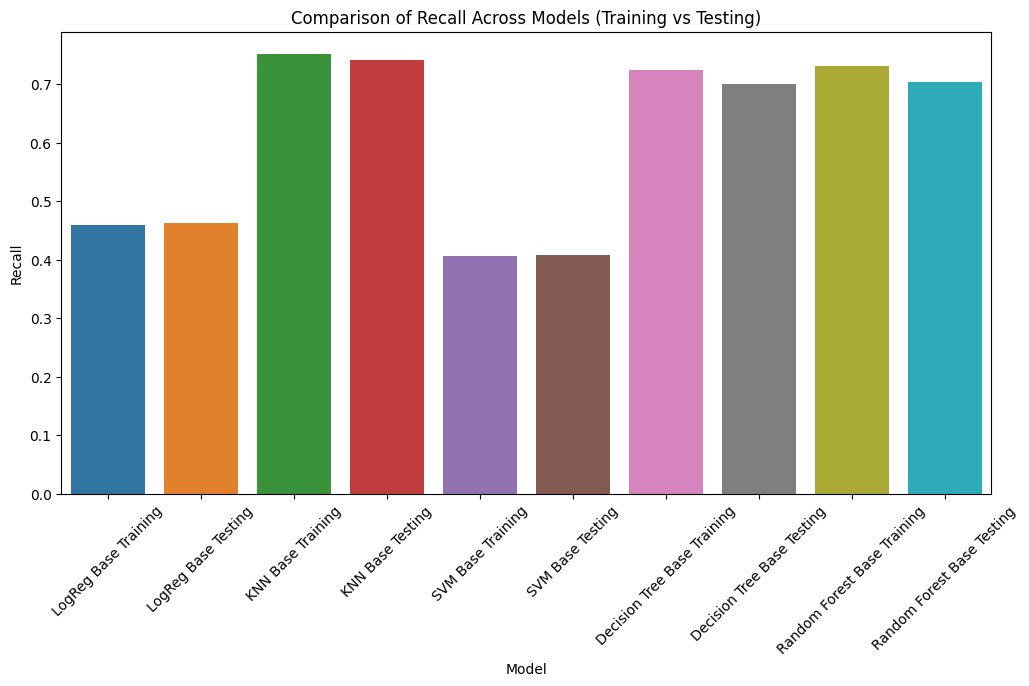

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Recall", data=metrics_df, hue="Model")
plt.xticks(rotation=45)
plt.title("Comparison of Recall Across Models (Training vs Testing)")
plt.show()


Pada proyek ini, fokus utama adalah meminimalkan **False Negatives**, yaitu kondisi di mana sistem gagal mendeteksi pelanggan yang memiliki kecenderungan untuk membatalkan reservasi. False Negatives menyebabkan kerugian besar, seperti kamar yang kosong (vacant rooms), kehilangan pendapatan dari F&B, dan ketidakakuratan dalam peramalan permintaan. Oleh karena itu, metrik yang menjadi prioritas utama adalah Recall, yang menunjukkan sejauh mana model mampu menangkap semua pelanggan yang cenderung membatalkan reservasi

Dari hasil evaluasi, **model KNN menunjukkan performa terbaik dalam hal Recall, dengan nilai 0.7520 pada Training dan 0.7408 pada Testing.** Hal ini menunjukkan bahwa KNN dapat mengidentifikasi pelanggan yang memiliki kecenderungan membatalkan reservasi dengan tingkat keberhasilan yang tinggi dibandingkan model lainnya

Selain memiliki nilai Recall yang tinggi, model KNN juga menunjukkan generalisasi yang baik. Gap antara Recall Training (0.7520) dan Testing (0.7408) sangat kecil, yaitu hanya 0.011. **Hal ini menunjukkan bahwa KNN dapat bekerja secara konsisten pada data baru tanpa mengalami overfitting.**

**Berdasarkan analisis tersebut, model KNN dipilih karena memiliki nilai Recall tertinggi pada data Training (0.7520) dan Testing (0.7408), serta menunjukkan performa yang konsisten tanpa overfitting. Model ini diharapkan mampu meminimalkan kerugian akibat pembatalan reservasi dengan mendeteksi pelanggan yang berpotensi membatalkan reservasi secara lebih efektif.**

### Hyperparameter

In [13]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

# Use the best model
best_knn = grid_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Laras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best Recall Score: 0.6921420760822762


In [14]:
# Predict on Testing Data
y_test_pred = best_knn.predict(X_test)

# Evaluate metrics
print("Final Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))


Final Evaluation Metrics:
Accuracy: 0.7861202512713132
Recall: 0.7420673863264639
Precision: 0.6942616679418516
F1-Score: 0.7173689619732785


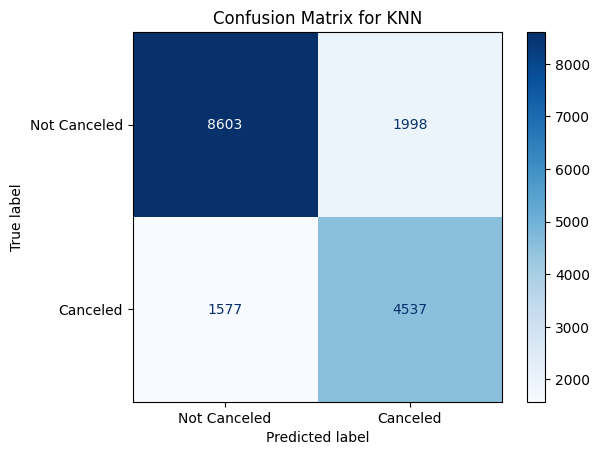

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.show()


In [16]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='recall')

print("Cross-Validation Recall Scores:", cv_scores)
print("Mean Recall:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Recall Scores: [0.73991486 0.69329009 0.68619501 0.68430657 0.65700385]
Mean Recall: 0.6921420760822762
Standard Deviation: 0.026888712389716758


Simpan model melalui pickle

In [17]:
import pickle
with open('best_knn.pkl', 'wb') as file:
    pickle.dump(model, file)
